<a href="https://colab.research.google.com/github/blensonpaul/ML/blob/main/excel_python_v3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program converts time series data of current and voltage into voltage-capacity series.
Battery testing data is taken from from CALCE  Battery  Research  Group: https://web.calce.umd.edu/batteries/data.htm

Author: Blenson Paul

Contact: blensonpaul@gmail.com

(contact me to get a optimized code)

In [ ]:
!wget https://web.calce.umd.edu/batteries/data/SP1_25C_LC_OCV_11_5_2015.zip

--2022-10-28 20:48:15--  https://web.calce.umd.edu/batteries/data/SP1_25C_LC_OCV_11_5_2015.zip
Resolving web.calce.umd.edu (web.calce.umd.edu)... 128.8.27.89
Connecting to web.calce.umd.edu (web.calce.umd.edu)|128.8.27.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3015812 (2.9M) [application/zip]
Saving to: ‘SP1_25C_LC_OCV_11_5_2015.zip’

SP1_25C_LC_OCV_11_5 100%[===================>]   2.88M  6.77MB/s    in 0.4s    

2022-10-28 20:48:15 (6.77 MB/s) - ‘SP1_25C_LC_OCV_11_5_2015.zip’ saved [3015812/3015812]



In [ ]:
!unzip SP1_25C_LC_OCV_11_5_2015.zip

Archive:  SP1_25C_LC_OCV_11_5_2015.zip
  inflating: 11_5_2015_low current OCV test_SP20-1.xlsx  


In [ ]:
!ls

'11_5_2015_low current OCV test_SP20-1.xlsx'   SP1_25C_LC_OCV_11_5_2015.zip
 sample_data


In [ ]:
# import pandas lib as pd
import pandas as pd
filename = '11_5_2015_low current OCV test_SP20-1.xlsx'
# read by default 1st sheet of an excel file
dataframe1 = pd.read_excel(filename)
#print(dataframe1)

In [ ]:
#@title
# note down the column names
# usefull at this point
time_duration = 'Duration (sec)'
step_variable = 'Pgm step'
voltage = 'mV'
current = 'mA'
temperature = 'Temperature'

In [ ]:
#dataframe1.head()
# access the column attribute
#dataframe1.columns
# datatype of each column
#dataframe1.dtypes
#dataframe1.info()

In [ ]:
# selecting one column
# Syntax 2 -NOT USED , cannot use variable
# just in case of simple data
#dataframe1.mV

In [ ]:
# selecting one column
# Syntax 1
# select a column with [] preferred way to slect a column
#dataframe1['mV']

In [ ]:
#selecting a column with a variable
#dataframe1[voltage]

In [ ]:
#dataframe1['mV']
#dataframe1[step_variable]

In [ ]:
#selecting two columns using [[]]
#dataframe1[[step_variable, voltage]]
# value_counts() method
#dataframe1[step_variable].value_counts()

In [ ]:
#min(dataframe1[voltage])
#max(dataframe1[voltage])
#

In [ ]:
#dataframe1[voltage].value_counts()

Plotting section

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#plt.plot(dataframe1[voltage].value_counts())

Selecting the step number

In [ ]:
# select the step number
# Step 2 is discharging and step 5 is charging
step_select = 3
# step_select = 5
dataframe2 = dataframe1[dataframe1[step_variable] == step_select]

Use pandas.DataFrame.query() to get a column value based on another column. Besides this method, you can also use DataFrame.loc[], DataFrame.iloc[], and DataFrame.values[] methods to select column value based on another column of pandas DataFrame.

In [ ]:
#to prnt dataframe
#dataframe2

In [ ]:
#to check data
#dataframe2.plot()
#plt.show()

In [ ]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77976 entries, 7347 to 85322
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Duration (sec)  77976 non-null  int64  
 1   Pgm step        77976 non-null  int64  
 2   mV              77976 non-null  int64  
 3   mA              77976 non-null  int64  
 4   Temperature     0 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 3.6 MB


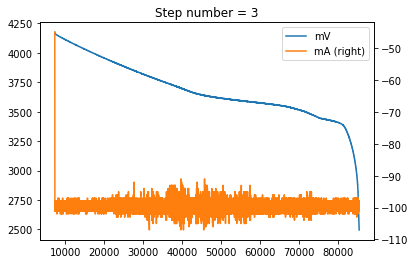

In [ ]:
# Create the figure and axes object to have multiple y axis 
#step_select = 5
dataframe2 = dataframe1[dataframe1[step_variable] == step_select]

fig, ax = plt.subplots()
dataframe2.plot(y = voltage , ax = ax) 
dataframe2.plot(y = current , ax = ax, secondary_y = True) 
plt.title("Step number = %i" %step_select)
plt.show()

In [ ]:


#round off volrage = two significant digit or 5%
#calculate min, max of voltage
#calculate voltage_step based on round off 
#create series[voltage_values, ampHour=0]
#loop check voltage > round off
# update (series [voltage_values, ampHour]) 
# where ampHour += timestep_difference * current 
# for that particular voltage_step

In [ ]:
#print(dataframe2[voltage].min())
#print(dataframe2[voltage].max())

In [ ]:
#dataframe2[voltage].value_counts()

In [ ]:
#amp hor series voltage step calculatiosn
voltage_unit = 3 
# 3 for millvolt measurements, 0 if measured in volts, -3 if measure in killovolts
decimal_point = 2
#---------------------------------
#round off volrage = two significant digit or 5%
voltage_start = np.round((dataframe2[voltage].min() / (10 ** voltage_unit)) , decimal_point)
voltage_end = np.round((dataframe2[voltage].max() / (10 ** voltage_unit)) , decimal_point)
voltage_step_count = (voltage_end -voltage_start) * (10 ** decimal_point)
# voltage_step_count_count is not used just for refernce
voltage_step = 10 ** (-1 * decimal_point)
#calculate min, max of voltage
#calculate voltage_step based on round off 



In [ ]:
print(voltage_start)
print(voltage_end)
print(voltage_step_count)
print(voltage_step)


2.5
4.18
167.99999999999997
0.01


In [ ]:
#create series[voltage_values, ampHour=0]
# range(start, stop, step) does not work
# np.arange (start, stop, step)
voltage_values = np.arange(voltage_start, voltage_end+voltage_step, voltage_step)
print(voltage_values)

[2.5  2.51 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63
 2.64 2.65 2.66 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77
 2.78 2.79 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91
 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04 3.05
 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.19
 3.2  3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32 3.33
 3.34 3.35 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44 3.45 3.46 3.47
 3.48 3.49 3.5  3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6  3.61
 3.62 3.63 3.64 3.65 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.73 3.74 3.75
 3.76 3.77 3.78 3.79 3.8  3.81 3.82 3.83 3.84 3.85 3.86 3.87 3.88 3.89
 3.9  3.91 3.92 3.93 3.94 3.95 3.96 3.97 3.98 3.99 4.   4.01 4.02 4.03
 4.04 4.05 4.06 4.07 4.08 4.09 4.1  4.11 4.12 4.13 4.14 4.15 4.16 4.17
 4.18]


In [ ]:

#print(dataframe3['voltage values'][159])
#dataframe3.info()
#chaged names later

In [ ]:
#dataframe3.plot()
#plt.show()

In [ ]:
#print(dataframe2[voltage])

In [ ]:
#dataframe2

In [ ]:
#dataframe3

In [ ]:
#dataframe3['voltage values']

In [ ]:
#dataframe2.dtypes

In [ ]:
#Assumption: data sampled every second

In [ ]:
# update (series [voltage_values, ampHour]) 
# where ampHour += timestep_difference * current 
# for that particular voltage_step
data = {'V' : voltage_values,
        'mAs': 0}
dataframe3 = pd.DataFrame(data)
dataframe3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       169 non-null    float64
 1   mAs     169 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


Assumption: we assume that data is logged every second, hence the milliamp second is sum of the current section. In case if there is a different steptime (or time dureation) of the data, code has to updated to calculate the time difference and then has to be multiplied with the current values to get Amp hour.

In [ ]:

data = {'V' : voltage_values,
        'mAs': 0}
dataframe3 = pd.DataFrame(data)

def find_index(comp_voltage, voltage_unit, decimal_point):  
  round_voltage = np.round((comp_voltage / (10 ** voltage_unit)), decimal_point)
  for j in dataframe3.index:
    if round_voltage == np.round(dataframe3['V'][j], decimal_point):
      return j

count = 0 
#loop check voltage > round off
for i in dataframe2[voltage].index:
  count += 1
  k = find_index(dataframe2.loc[i][voltage], voltage_unit, decimal_point)
  dataframe3.loc[[k], 'mAs'] = dataframe3['mAs'][k] + dataframe2.loc[i][current]
print(count)

77976


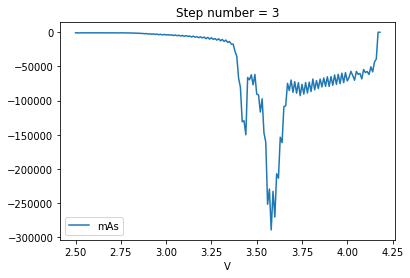

In [ ]:
#to check data
dataframe3.plot(x='V', y='mAs')
plt.title("Step number = %i" %step_select)
plt.show()

In [ ]:
dataframe3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       169 non-null    float64
 1   mAs     169 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [ ]:
dataframe2.info

<bound method DataFrame.info of        Duration (sec)  Pgm step    mV   mA  Temperature
7347             7354         3  4175  -45          NaN
7348             7355         3  4165 -101          NaN
7349             7356         3  4165 -100          NaN
7350             7357         3  4165  -99          NaN
7351             7358         3  4165  -99          NaN
...               ...       ...   ...  ...          ...
85318           85335         3  2501 -100          NaN
85319           85336         3  2500 -100          NaN
85320           85337         3  2498  -99          NaN
85321           85338         3  2497 -100          NaN
85322           85339         3  2496  -99          NaN

[77976 rows x 5 columns]>

In [ ]:
#to download the Dataframe3 values locally
from google.colab import files

dataframe3.to_csv('dataframe3.csv')
files.download('dataframe3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>